### Evren Çetinkaya
### ID: 150170118

## Part A: Examine training sets
**In this part, training datasets will be imported, covariance matrices are calculated and plot these datasets with two overlaid histogram and scatter plots.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import math
import random
from sklearn.model_selection import KFold
df1 = pd.read_csv("train1.csv") 
df2 = pd.read_csv("train2.csv") 
df2m = pd.read_csv("train2_modified.csv") #will be used in Part D

In [2]:
#By printing a dataframe, you can view the data in csv format
df1.head(10) #Dataframe 1 first 10 element

,x1,x2,y
0,4.786214,4.650073,1.0
1,3.170196,4.005515,1.0
2,5.000920,4.897350,1.0
3,4.522969,6.215182,0.0
4,3.599857,5.564085,0.0
5,3.731102,3.951173,1.0
6,4.316959,5.421007,1.0
7,4.444445,5.533156,0.0
8,5.304393,7.237585,0.0
9,4.278225,6.463720,0.0


In [3]:
df2.head(10) #Dataframe 2 first 10 element

,x1,x2,y
0,3.614646,2.924913,1.0
1,5.626771,8.359861,0.0
2,4.578809,5.688260,1.0
3,4.616945,7.350656,0.0
4,4.682481,6.423178,0.0
5,4.415486,3.953422,1.0
6,4.017379,6.903292,0.0
7,3.451679,4.566132,1.0
8,5.616081,4.765069,1.0
9,3.911283,5.676729,0.0


In [4]:
df1_label_0 = df1[df1['y'] == 0]  #Seperating labels
df1_label_1 = df1[df1['y'] == 1]  #Seperating labels

In [5]:
df2_label_0 = df2[df2['y'] == 0]  #Seperating labels
df2_label_1 = df2[df2['y'] == 1]  #Seperating labels

In [6]:
df2m_label_0 = df2m[df2m['y'] == 0]  #Seperating labels
df2m_label_1 = df2m[df2m['y'] == 1]  #Seperating labels

In [7]:
df1_feature_1 = df1['x1'].values  #Extracting features as numpy array
df1_feature_2 = df1['x2'].values  #Extracting features as numpy array

df2_feature_1 = df2['x1'].values  #Extracting features as numpy array
df2_feature_2 = df2['x2'].values  #Extracting features as numpy array

df2m_feature_1 = df2m['x1'].values #Extracting features as numpy array
df2m_feature_2 = df2m['x2'].values #Extracting features as numpy array

In [8]:
#You can also extract a specific feature as numpy array as well.
df1_label_0 = df1_label_0[['x1','x2']].values #Extracting all features from dataset
df1_label_1 = df1_label_1[['x1','x2']].values #Extracting all features from dataset

In [9]:
#You can also extract a specific feature as numpy array  as well.
df2_label_0 = df2_label_0[['x1','x2']].values #Extracting all features from dataset
df2_label_1 = df2_label_1[['x1','x2']].values #Extracting all features from dataset

In [10]:
#You can also extract a specific feature as numpy array as well.
df2m_label_0 = df2m_label_0[['x1','x2']].values #Extracting all features from dataset
df2m_label_1 = df2m_label_1[['x1','x2']].values #Extracting all features from dataset

**In this section, covariance matrices for all class is calculated by using function below**

In [11]:
def calculate_covariance(df1_x1_numpy):  #Calculate covariance
    mean_1 = np.mean(df1_x1_numpy[0])    #Mean of Feature 1
    mean_2 = np.mean(df1_x1_numpy[1])    #Mean of Feature 2
    my_covariance_matrix = np.zeros((df1_x1_numpy.shape[0],df1_x1_numpy.shape[0]))  #Create matrix full zeros first
    res = 0
    for i in range(df1_x1_numpy.shape[0]):
        for j in range(df1_x1_numpy.shape[0]):
            for a in range(df1_x1_numpy.shape[1]):   #Create elements for all index
                if(i == 0 and j == 0):
                    res += (df1_x1_numpy[i][a] - mean_1)*(df1_x1_numpy[j][a] - mean_1)
                elif(i == 0 and j == 1):
                    res += (df1_x1_numpy[i][a] - mean_1)*(df1_x1_numpy[j][a] - mean_2)
                elif(i == 1 and j == 0):
                    res += (df1_x1_numpy[i][a] - mean_2)*(df1_x1_numpy[j][a] - mean_1)
                else:
                    res += (df1_x1_numpy[i][a] - mean_2)*(df1_x1_numpy[j][a] - mean_2)
            res = res/(df1_x1_numpy.shape[1])
            my_covariance_matrix[i][j]=res
            res = 0
    
    return my_covariance_matrix   #Returns covariance matrix

In [12]:
df1_label_0 = df1_label_0.T   #Transpoze of each label
df1_label_1 = df1_label_1.T   #Transpoze of each label

In [13]:
df2_label_0 = df2_label_0.T  #Transpoze of each label
df2_label_1 = df2_label_1.T  #Transpoze of each label

In [14]:
df2m_label_0 = df2m_label_0.T  #Transpoze of each label
df2m_label_1 = df2m_label_1.T  #Transpoze of each label

In [15]:
#cov_mtrx = np.cov(df1_x1_numpy)
#print("Asil sonuc: ", cov_mtrx)
my_cov_df1_label_0 = calculate_covariance(df1_label_0)  #Calculating covariance matrix of the Dataframe 1 class 0
my_cov_df1_label_1 = calculate_covariance(df1_label_1)  #Calculating covariance matrix of the Dataframe 1 class 1
print("Dataframe 1 Label 0 Covariance Matrix:\n", my_cov_df1_label_0,"\n")
print("Dataframe 1 Label 1 Covariance Matrix:\n", my_cov_df1_label_1)

Dataframe 1 Label 0 Covariance Matrix:
 [[0.30779503 0.20875556]
 [0.20875556 0.403941  ]] 

Dataframe 1 Label 1 Covariance Matrix:
 [[0.30779503 0.20875556]
 [0.20875556 0.403941  ]]


In [16]:
#cov_mtrx = np.cov(df1_x1_numpy)
#print("Asil sonuc: ", cov_mtrx)
my_cov_df2_label_0 = calculate_covariance(df2_label_0)  #Calculating covariance matrix of the Dataframe 2 class 0
my_cov_df2_label_1 = calculate_covariance(df2_label_1)  #Calculating covariance matrix of the Dataframe 2 class 1
print("Dataframe 2 Label 0 Covariance Matrix:\n", my_cov_df2_label_0,"\n")
print("Dataframe 2 Label 1 Covariance Matrix:\n", my_cov_df2_label_1)

Dataframe 2 Label 0 Covariance Matrix:
 [[0.29913689 0.19183728]
 [0.19183728 0.3972486 ]] 

Dataframe 2 Label 1 Covariance Matrix:
 [[0.77441134 0.08920795]
 [0.08920795 0.52736643]]


**Covariance matrices are found for each dataset and each class above. We can plot these datasets as histograms and scatters with their features**

C:\Users\evren\anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  del sys.path[0]
C:\Users\evren\anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  
C:\Users\evren\anaconda3\lib\site-packages\ipykernel_launcher.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
C:\Users\evren\anaconda3\lib\site-packages\ipykernel_launcher.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
C:\Users\evren\anaconda3\lib\site-packages\ipykernel_launcher.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
C:\Users\evren\anaconda3\lib\site-packages\ipykernel_launcher.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
C:\Users\evren\anaconda3\lib\site-packages\ipykernel_launcher.py:34: UserWarning: FixedFormatter should only be use

Text(0.5, 1.0, 'Dataset 2 Label 1 Covariance')

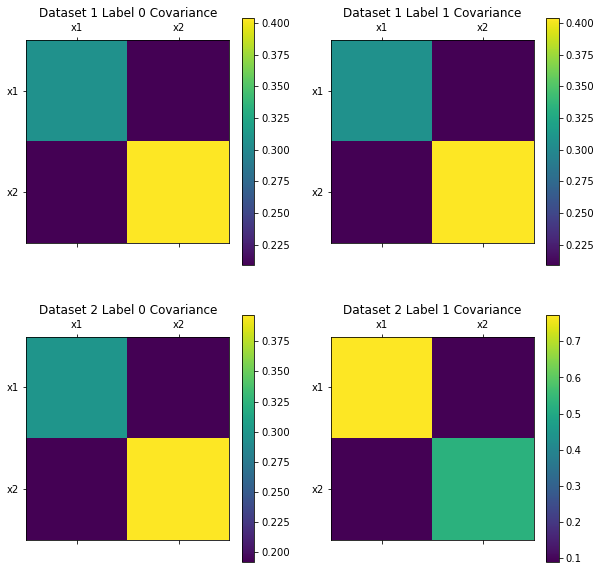

In [17]:
#PART A: Examine training sets here. plots etc.
#Hint: df1_class0 = df1[df1['column_name']==0] creates a new dataframe and includes samples (rows) whose class values are 0
#hint: for data distribution plots use plt.scatter(x-axis,y-axis,other params. check online)
#Hint: for each new plot use plt.figure() so they won't overlap, one on top of another
#-------
#to plot cov. matrices you may use following code: (compute 'cov_mtrx' by yourself)
alpha = ['x1', 'x2']
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(221)
cax = ax.matshow(my_cov_df1_label_0, interpolation='nearest') #cov. matrix of dataset1
fig.colorbar(cax)
ax.set_xticklabels(['']+alpha)
ax.set_yticklabels(['']+alpha)
ax.set_title('Dataset 1 Label 0 Covariance')

ax2 = fig.add_subplot(222)
cax = ax2.matshow(my_cov_df1_label_1,interpolation='nearest') #cov. matrix of dataset1
fig.colorbar(cax)
ax2.set_xticklabels(['']+alpha)
ax2.set_yticklabels(['']+alpha)
ax2.set_title('Dataset 1 Label 1 Covariance')

ax2 = fig.add_subplot(223)
cax = ax2.matshow(my_cov_df2_label_0,interpolation='nearest') #cov. matrix of dataset1
fig.colorbar(cax)
ax2.set_xticklabels(['']+alpha)
ax2.set_yticklabels(['']+alpha)
ax2.set_title('Dataset 2 Label 0 Covariance')

ax2 = fig.add_subplot(224)
cax = ax2.matshow(my_cov_df2_label_1,interpolation='nearest') #cov. matrix of dataset1
fig.colorbar(cax)
ax2.set_xticklabels(['']+alpha)
ax2.set_yticklabels(['']+alpha)
ax2.set_title('Dataset 2 Label 1 Covariance')

#---------
#for the histogram plots use plt.hist() (Remember: 4 of them we want)
#for title use: plt.gca().set(title='Data distribution of feature x of trainingSet y', ylabel='Frequency')

**As we can see to these covariance matrices, we can interpret that the dataset 1 covariance matrices for both class 0 and class 1 is the same . In the matrices for class 0 and 1, variances and the other elements are the same and positive numbers. Also they are linear and can be calculated by Eucledian distance when training. However in dataset 2, covariance matrices are different. Although these colors looks like similar, the colours they represent values are different. This dataset is quadratic and can be calculated via Mahalanobis Distance when training.**

**Example set of feature for dataframe 1, class 0**

In [18]:
df1_label_0

array([[4.52296945, 3.59985682, 4.44444465, 5.30439251, 4.27822548,
        4.53229869, 5.20091972, 3.92999876, 4.69770953, 3.96512602,
        4.73726809, 3.86136111, 3.651201  , 3.57141504, 3.7112495 ,
        3.88853675, 4.58458187, 4.5193278 , 3.72321597, 3.42461318,
        5.17004357, 4.28701442, 5.29856101, 4.09507733, 3.79347689,
        4.34505179, 3.79809486, 3.9127795 , 3.5245603 , 4.47555271,
        4.98621384, 4.48412026, 3.85385531, 4.5853951 , 4.49192715,
        4.01771569, 4.08730014, 4.39558037, 3.6500672 , 4.27169515,
        3.83347398, 4.01038187, 3.37682398, 3.3701956 , 4.04282558,
        4.61596359, 3.42907412, 4.48193753, 4.0737434 , 2.88196885,
        4.37986347, 3.41592926, 4.62353594, 3.4175708 , 4.15396419,
        4.51695948, 5.40953653, 3.86089938, 4.56568417, 4.6298607 ,
        3.69397987, 3.20088381, 4.20525115, 4.00058426, 3.93110226,
        4.39936398, 4.21278082, 4.28108317, 5.18531972, 3.74439664,
        5.45579323, 3.53367736, 4.16431489, 4.23

**We can plot two overlaid transparent histograms for each feature and different classes. Subplots are used for creating histograms**

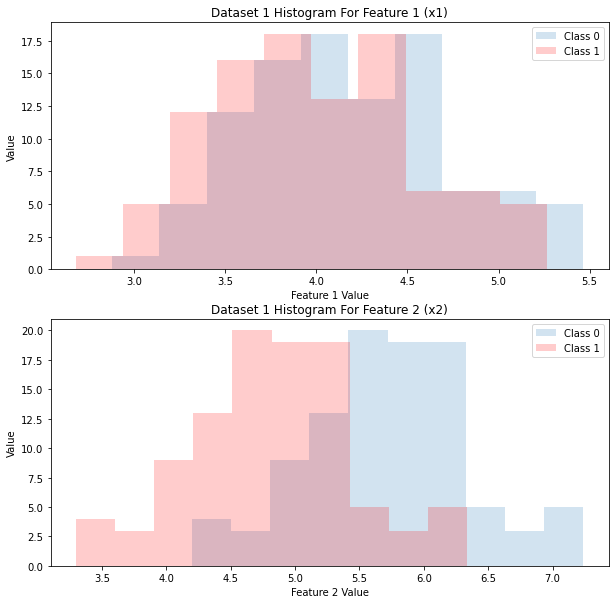

In [19]:
# Create two overlayed histograms

df1_x1_label_0 = df1_label_0[0]
df1_x2_label_0 = df1_label_0[1]

df1_x1_label_1 = df1_label_1[0]
df1_x2_label_1 = df1_label_1[1]

df2_x1_label_0 = df2_label_0[0]
df2_x2_label_0 = df2_label_0[1]

df2_x1_label_1 = df2_label_1[0]
df2_x2_label_1 = df2_label_1[1]

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(211)

ax.hist(df1_x1_label_0, alpha=0.2)
ax.hist(df1_x1_label_1, alpha=0.2,color='r')

ax.legend(["Class 0", "Class 1"])
plt.title("Dataset 1 Histogram For Feature 1 (x1)")
plt.ylabel("Value")
plt.xlabel("Feature 1 Value")


ax2 = fig.add_subplot(212)

ax2.hist(df1_x2_label_0, alpha=0.2)
ax2.hist(df1_x2_label_1, alpha=0.2,color='r')

ax2.legend(["Class 0", "Class 1"])
plt.title("Dataset 1 Histogram For Feature 2 (x2)")
plt.ylabel("Value")
plt.xlabel("Feature 2 Value")



plt.show()

**As we can see from these histograms above, classes in Feature 1 are so close. Their features are very similar but classes are different. It can causes of decreasing performance when training and discriminating this feature for classifying. For feature 2, classes are more far and can be discrimated easier than feature 1 for dataset 1. However, feature 2 has also some similarities among class 0 and class 1**

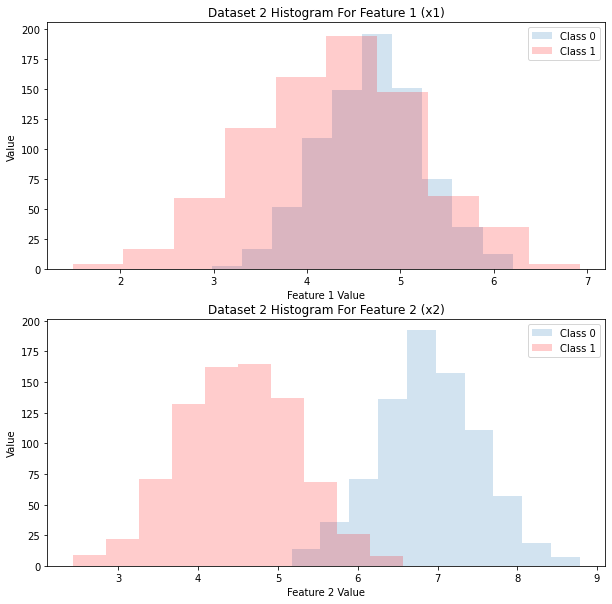

In [20]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(211)

ax.hist(df2_x1_label_0, alpha=0.2)
ax.hist(df2_x1_label_1, alpha=0.2,color='r')

ax.legend(["Class 0", "Class 1"])
plt.title("Dataset 2 Histogram For Feature 1 (x1)")
plt.ylabel("Value")
plt.xlabel("Feature 1 Value")


ax2 = fig.add_subplot(212)

ax2.hist(df2_x2_label_0, alpha=0.2)
ax2.hist(df2_x2_label_1, alpha=0.2,color='r')

ax2.legend(["Class 0", "Class 1"])
plt.title("Dataset 2 Histogram For Feature 2 (x2)")
plt.ylabel("Value")
plt.xlabel("Feature 2 Value")


plt.show()

**As we can see from these histograms above, classes in Feature 1 are so close. Their features are very similar but classes are different. It can causes of decreasing performance when training and discriminating this feature for classifying. For feature 2, classes are more far and can be discrimated easier. This feature can help more for classifying two classes when training and testing.**

**These datasets can also be plotted by using scatter plots. In this code below, x axis will be used for feature 1 and y axis will be used for feature 2.**

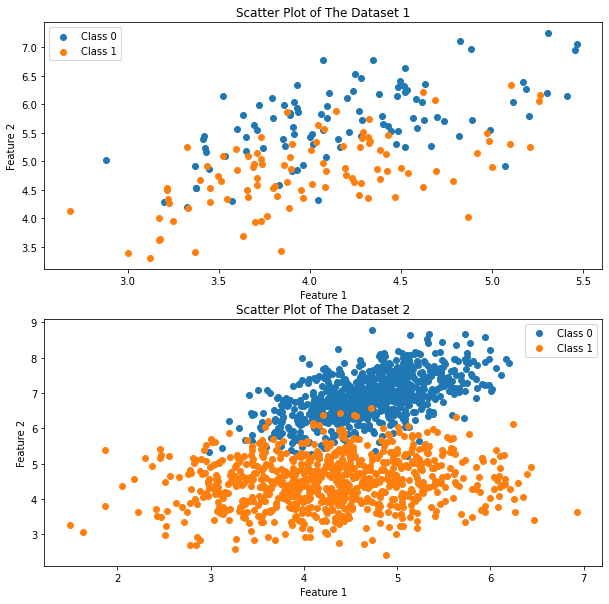

In [21]:
fig = plt.figure(figsize=(10,10)) #Creating and adjusting the scale figures
ax = fig.add_subplot(211)       #Create first subplot for Dataset 1

ax.scatter(df1_x1_label_0,df1_x2_label_0)    #Scatter plot for class 0
ax.scatter(df1_x1_label_1,df1_x2_label_1)    #Scatter plot for class 1

ax.legend(["Class 0", "Class 1"])
plt.title("Scatter Plot of The Dataset 1")
plt.ylabel("Feature 2")
plt.xlabel("Feature 1")

ax2 = fig.add_subplot(212)   #Create second subplot for Dataset 2

ax2.scatter(df2_x1_label_0,df2_x2_label_0) #Scatter plot for class 0
ax2.scatter(df2_x1_label_1,df2_x2_label_1) #Scatter plot for class 1

ax2.legend(["Class 0", "Class 1"])
plt.title("Scatter Plot of The Dataset 2")
plt.ylabel("Feature 2")
plt.xlabel("Feature 1")

plt.show()


**By looking these scatters, we can understand that the feature 1 for both dataset are similar and it is hard for discriminating.**

## PART B - Evaluation of Bayes classifier using random single dataset split into train and test sets

**In this part, mean vectors and the covariances will be calculated. Discriminant function gi(x) will be created, datasets will be trained and tested.**

**Covariance matrices for each dataframe and label**

In [22]:
print("Dataframe 1 Label 0 Covariance Matrix:\n", my_cov_df1_label_0,"\n")
print("Dataframe 1 Label 1 Covariance Matrix:\n", my_cov_df1_label_1,"\n\n")
print("Dataframe 2 Label 0 Covariance Matrix:\n", my_cov_df2_label_0,"\n")
print("Dataframe 2 Label 1 Covariance Matrix:\n", my_cov_df2_label_1)

Dataframe 1 Label 0 Covariance Matrix:
 [[0.30779503 0.20875556]
 [0.20875556 0.403941  ]] 

Dataframe 1 Label 1 Covariance Matrix:
 [[0.30779503 0.20875556]
 [0.20875556 0.403941  ]] 


Dataframe 2 Label 0 Covariance Matrix:
 [[0.29913689 0.19183728]
 [0.19183728 0.3972486 ]] 

Dataframe 2 Label 1 Covariance Matrix:
 [[0.77441134 0.08920795]
 [0.08920795 0.52736643]]


**Mean Vectors for each feature at each datasets**

In [23]:
mean_vector_df1_class_0 = np.array([np.mean(df1_label_0[0]),np.mean(df1_label_0[1])])

mean_vector_df1_class_1 = np.array([np.mean(df1_label_1[0]),np.mean(df1_label_1[1])])

mean_vector_df2_class_0 = np.array([np.mean(df2_label_0[0]),np.mean(df2_label_0[1])])

mean_vector_df2_class_1 = np.array([np.mean(df2_label_1[0]),np.mean(df2_label_1[1])])

print("Mean Vector of Dataset 1 Class 0\n", mean_vector_df1_class_0, "\n")
print("Mean Vector of Dataset 1 Class 1\n", mean_vector_df1_class_1, "\n")
print("Mean Vector of Dataset 2 Class 0\n", mean_vector_df2_class_0, "\n")
print("Mean Vector of Dataset 2 Class 1\n", mean_vector_df2_class_1, "\n")

Mean Vector of Dataset 1 Class 0
 [4.2 5.7] 

Mean Vector of Dataset 1 Class 1
 [4.  4.8] 

Mean Vector of Dataset 2 Class 0
 [4.69156024 6.8893364 ] 

Mean Vector of Dataset 2 Class 1
 [4.29725029 4.50444121] 



**In this part, a dataset will be trained and the discriminant function will be created. For this, we have two cases. If the covariances of the dataset is the same, linear method will be applied (gi(x) = w1^t*x + w0). In addition, w1^t and w0 coefficients will be calculated for each class. If the covariances are not equal to each other into dataset, quadratic discriminant function will be applied (gi(x) = x.T*W*x + w^i.T*x + wi0). In this function, x.T*W*x,  w^i.T and wi0 coefficients will be calculated for each class**

In [24]:
def trainBayes(df):
    
    df_label_0 = df[df['y'] == 0]   #Seperate each labels
    df_label_1 = df[df['y'] == 1]    #Seperate each labels
    df_features_0 = df_label_0[['x1','x2']].values.T  #Extract features as its transpozes
    df_features_1 = df_label_1[['x1','x2']].values.T  #Extract features as its transpozes


    mean_vector_class_0 = np.array([np.mean(df_features_0[0]),np.mean(df_features_0[1])])  #Mean vectors are calculated
    mean_vector_class_1 = np.array([np.mean(df_features_1[0]),np.mean(df_features_1[1])])  #Mean vectors are calculated
    cov_matr_0 = calculate_covariance(df_features_0)   #Covariance matrix class 0 calculated
    cov_matr_1 = calculate_covariance(df_features_1)   #Covariance matrix class 1 calculated
    cov_matr_0_inv = np.linalg.inv(cov_matr_0)    #Inverse covariance matrices calculated
    cov_matr_1_inv = np.linalg.inv(cov_matr_1)    #Inverse covariance matrices calculated
    df_features_0 = df_features_0.T     #Features are transpozed
    df_features_1 = df_features_1.T     #Features are transpozed
    sample_size_0 = len(df_features_0)  #Sample size for class 0 is calculated
    sample_size_1 = len(df_features_1)  #Sample size for class 1 is calculated

    prob_0 = (sample_size_0)/(sample_size_0 + sample_size_1)  #The probability of class 0 (P(c0)) is calculated
    prob_1 = (sample_size_1)/(sample_size_0 + sample_size_1)  #The probability of class 1 (P(c1)) is calculated
    my_predict_0 = []  
    my_predict_1 = []
    quadratic_inx_0 = 0  #quadratic inx 0 set as 0 first
    quadratic_inx_1 = 0  #quadratic inx 1 set as 0 first
    
    if np.isclose(cov_matr_0, cov_matr_1).all(): #If the covariances are equal, linear function is calculated (ax+ b or w1^t*x + w0)
        a_label_0 = np.dot(mean_vector_class_0.T, cov_matr_0_inv)
        b_label_0 = np.log(prob_0) - (1/2)*(np.dot(np.dot(mean_vector_class_0.T, cov_matr_0_inv),mean_vector_class_0))
        
        a_label_1 = np.dot(mean_vector_class_1.T, cov_matr_1_inv)
        b_label_1 = np.log(prob_1) - (1/2)*(np.dot(np.dot(mean_vector_class_1.T, cov_matr_1_inv),mean_vector_class_1))
    else: #If the covariances are not equal, quadratic function is calculated (quadratic_inx + ax+ b or x.T*W*x + w^i.T*x + wi0)
        quadratic_inx_0 = -np.dot((1/2),cov_matr_0_inv)
        a_label_0 = np.dot(mean_vector_class_0.T, cov_matr_0_inv)
        b_label_0 = -(1/2)*(np.dot(np.dot(mean_vector_class_0.T,cov_matr_0_inv),mean_vector_class_0)) -(1/2)*np.log(np.linalg.det(cov_matr_0)) + np.log(prob_0)
        
        quadratic_inx_1 = -np.dot((1/2),cov_matr_1_inv)
        a_label_1 = np.dot(mean_vector_class_1.T, cov_matr_1_inv)
        b_label_1 = -(1/2)*(np.dot(np.dot(mean_vector_class_1.T,cov_matr_1_inv),mean_vector_class_1)) -(1/2)*np.log(np.linalg.det(cov_matr_1)) + np.log(prob_1)
        

    return a_label_0,b_label_0,a_label_1,b_label_1,quadratic_inx_0,quadratic_inx_1 #Coefficients are returned

**After implementing trainin function, we can train by sending features to the training function. After gaining the discriminant function, we can apply it to classify the test data**

In [25]:
def classify_dataset(x,a0,b0,a1,b1,quad_0,quad_1):  #Classify the test datasets, by taking discriminant coefficients as input.
    y_predicted = []       #Predicted values by discriminant function
    x_data = x[['x1', 'x2']].values   #Extracting features from test data

    for i in range(len(x_data)):    #Features are taken from dataset one by one
        if np.sum(quad_0) == 0 and np.sum(quad_1) == 0:  #If this dataset is not quadratic, quadratic coefficients are assumed as 0
            quad_0_mod = 0
            quad_1_mod = 0
            pass
        else:      #If this dataset is quadratic, x.T*W*x is calculated
            x_transpoze = x_data[i].reshape(-1,1).T
            quad_0_mod = np.dot(np.dot(x_transpoze, quad_0),x_data[i].reshape(2,1))
            quad_1_mod = np.dot(np.dot(x_transpoze, quad_1),x_data[i].reshape(2,1))
            
        predict_class_0 = quad_0_mod + np.dot(a0,x_data[i]) + b0 #Then, testing features are going to the discriminant functions
        predict_class_1 = quad_1_mod + np.dot(a1,x_data[i]) + b1 #Then, testing features are going to the discriminant functions
        if(predict_class_0 > predict_class_1):  #If the class 0 probability of features are higher than class 1 probability
            result = 0       #This sample will predicted as class 0
        else:
            result = 1       #If not, this sample will predicted as class 1
        y_predicted.append(result)    #These predictions are saced
        
    return y_predicted   #These predictions are returned

## Testing Dataset 1 by Training with Dataset 1

In [26]:
a0,b0,a1,b1,quad_0, quad_1 = trainBayes(df1)
my_res = classify_dataset(df1, a0,b0,a1,b1,quad_0, quad_1)
print(my_res)

[1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0]


**Here is the predicted values for dataset 1 above**

**We can calculate the error rate of this class by using both predicted labels and ground-truth labels**

In [27]:
my_res = np.array(my_res).astype(np.float32)
ground_truth_df1 = df1['y'].values
res = np.abs(ground_truth_df1 - my_res)
occurrences = np.count_nonzero(res == 1)
error_rate = (occurrences/len(df1))*100
print("The error rate of Dataset 2 is: %",error_rate)

The error rate of Dataset 2 is: % 21.0


In [28]:
df1.head(10)

,x1,x2,y
0,4.786214,4.650073,1.0
1,3.170196,4.005515,1.0
2,5.000920,4.897350,1.0
3,4.522969,6.215182,0.0
4,3.599857,5.564085,0.0
5,3.731102,3.951173,1.0
6,4.316959,5.421007,1.0
7,4.444445,5.533156,0.0
8,5.304393,7.237585,0.0
9,4.278225,6.463720,0.0


## Testing Dataset 2 by Training with Dataset 2

In [29]:
a0,b0,a1,b1,quad_0, quad_1 = trainBayes(df2)
my_res = classify_dataset(df2, a0,b0,a1,b1,quad_0, quad_1)
print(my_res)

[1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 

**Here is the predicted values for dataset 1 above**

**We can calculate the error rate of this class by using both predicted labels and ground-truth labels**

In [30]:
my_res = np.array(my_res).astype(np.float32)
ground_truth_df2 = df2['y'].values
res = np.abs(ground_truth_df2 - my_res)
occurrences = np.count_nonzero(res == 1)
error_rate = (occurrences/len(df2))*100
print("The error rate of Dataset 2 is: %",error_rate)

The error rate of Dataset 2 is: % 3.25


In [31]:
df2.head(10)

,x1,x2,y
0,3.614646,2.924913,1.0
1,5.626771,8.359861,0.0
2,4.578809,5.688260,1.0
3,4.616945,7.350656,0.0
4,4.682481,6.423178,0.0
5,4.415486,3.953422,1.0
6,4.017379,6.903292,0.0
7,3.451679,4.566132,1.0
8,5.616081,4.765069,1.0
9,3.911283,5.676729,0.0


## Testing the Test Datasets and Calculating the Error

**Now, we are using the test datasets which are not included while training (unseen data), and we will gain error rates.**

In [32]:
#Implement PART B:
test1 = pd.read_csv("test1.csv")   #Read test1
test2 = pd.read_csv("test2.csv")   #Read test2

In [33]:
test1.head(10)   #Show first 10 sample from test1

,x1,x2,y
0,4.834707,5.518777,1.0
1,3.758435,4.227406,1.0
2,4.195908,5.421247,0.0
3,3.696578,5.595470,0.0
4,4.766536,5.451948,0.0
5,3.995908,4.521247,1.0
6,4.332009,6.019581,0.0
7,3.627079,4.945297,0.0
8,3.621785,5.680205,0.0
9,3.637066,4.964107,1.0


In [34]:
test2.head(10) #Show first 10 sample from test1

,x1,x2,y
0,4.418160,5.223632,1.0
1,4.509276,5.495003,0.0
2,5.131102,4.692929,1.0
3,4.159342,7.058550,0.0
4,3.872938,5.929577,0.0
5,3.839523,7.217872,0.0
6,4.899772,4.290045,1.0
7,4.747105,6.326746,0.0
8,5.099105,3.861619,1.0
9,4.815539,5.661825,1.0


## Implementation of Test dataset into the Naive Bayes Classifier

### Test 1
**Dataframe 1 is trained and the test1 dataset will be tested into Bayes classifier**

In [35]:
a0,b0,a1,b1,quad_0, quad_1 = trainBayes(df1)   #Model is trained by Dataset 1
my_res = np.array(classify_dataset(test1,a0,b0,a1,b1,quad_0,quad_1)).astype(np.float32)  #Test1 results are saved as vector
ground_truth_test1 = test1['y'].values
res = np.abs(ground_truth_test1 - my_res)
occurrences = np.count_nonzero(res == 1)
error_rate = (occurrences/len(test1))*100      #Error rate is calculated
print("The error rate of Test 1 is: %",error_rate)

The error rate of Test 1 is: % 20.0


**We have %20 error rate for test 1 dataset**

### Test 2
**Dataframe 2 is trained and the test2 dataset will be tested into Bayes classifier**

In [36]:
a0,b0,a1,b1,quad_0, quad_1 = trainBayes(df2)    #Model is trained by Dataset 2
my_res_2 = np.array(classify_dataset(test2,a0,b0,a1,b1,quad_0,quad_1)).astype(np.float32) #Test2 results are saved as vector
ground_truth_test2 = test2['y'].values
res_2 = np.abs(ground_truth_test2 - my_res_2)
occurrences = np.count_nonzero(res_2 == 1)
error_rate = (occurrences/len(test2))*100  #Error rate is calculated
print("The error rate of Test 2 is: %",error_rate)

The error rate of Test 2 is: % 3.0


**We have %3 error rate for test 2 dataset**

## PART C - Evaluation of Bayes classifier using 3-fold cross-validation

**In this section, we will use 3-Fold Cross Validation while training and testin datasets. For doing that, Scikit-Learn library will be used.**

**Firstly, train and test samples for each datasets are concatenated.**

In [37]:
#Implement PART C:

concat_train_test_1 = pd.concat([df1,test1], axis=0).reset_index().drop(['index'],axis = 1) #Concatenate
concat_train_test_2 = pd.concat([df2,test2], axis=0).reset_index().drop(['index'],axis = 1) #Concatenate
concat_train_test_1

,x1,x2,y
0,4.786214,4.650073,1.0
1,3.170196,4.005515,1.0
2,5.000920,4.897350,1.0
3,4.522969,6.215182,0.0
4,3.599857,5.564085,0.0
...,...,...,...
295,5.034707,6.418777,0.0
296,3.605000,4.456600,1.0
297,4.153244,4.857783,0.0
298,3.258241,4.223597,1.0


In [38]:
concat_train_test_2  #Concatenated dataset

,x1,x2,y
0,3.614646,2.924913,1.0
1,5.626771,8.359861,0.0
2,4.578809,5.688260,1.0
3,4.616945,7.350656,0.0
4,4.682481,6.423178,0.0
...,...,...,...
1995,2.919332,4.784195,1.0
1996,5.252280,7.237716,0.0
1997,3.698371,3.761957,1.0
1998,4.228699,8.790368,0.0


## Applying 3-Fold Cross Validation on These New Datasets

### Dataset 1 (Train + Test Concatenating)

In [39]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=3, random_state = 1773, shuffle=True)  #3 Fold and random state is 1773
kf.get_n_splits(concat_train_test_1)
error_rates_fold = []
print("3-FOLD CROSS VALIDATION FOR DATASET 1 (TRAIN+TEST)\n")
for train, test in kf.split(concat_train_test_1):     #For each fold, we have train and test samples are splitted
                                                      #Covariances and mean vectors are calculated
    
    train_dataset = concat_train_test_1.take(train)
    test_dataset = concat_train_test_1.take(test)
    
    train_label_0 = train_dataset[train_dataset['y'] == 0]
    train_label_1 = train_dataset[train_dataset['y'] == 1]
    test_label_0 = test_dataset[test_dataset['y'] == 0]
    test_label_1 = test_dataset[test_dataset['y'] == 1]
    
    
    train_features_0 = train_label_0[['x1','x2']].values.T
    train_features_1 = train_label_1[['x1','x2']].values.T
    test_features_0 = test_label_0[['x1','x2']].values.T
    test_features_1 = test_label_1[['x1','x2']].values.T


    mean_vector_train_class_0 = np.array([np.mean(train_features_0[0]),np.mean(train_features_0[1])])
    mean_vector_train_class_1 = np.array([np.mean(train_features_1[0]),np.mean(train_features_1[1])])
    mean_vector_test_class_0 = np.array([np.mean(test_features_0[0]),np.mean(test_features_0[1])])
    mean_vector_test_class_1 = np.array([np.mean(test_features_1[0]),np.mean(test_features_1[1])])
                                
    cov_matr_train_0 = calculate_covariance(train_features_0)
    cov_matr_train_1 = calculate_covariance(train_features_1)
    cov_matr_test_0 = calculate_covariance(test_features_0)
    cov_matr_test_1 = calculate_covariance(test_features_1)
                                
    print("Mean Vector of Train Dataset Class 0\n", mean_vector_train_class_0,"\n")
    print("Mean Vector of Train Dataset Class 1\n", mean_vector_train_class_1,"\n")
    print("Mean Vector of Test Dataset Class 0\n", mean_vector_test_class_0,"\n")
    print("Mean Vector of Test Dataset Class 1\n", mean_vector_test_class_1,"\n")
                                
    print("Covariance Matrix of Train Dataset Class 0\n", cov_matr_train_0,"\n")
    print("Covariance Matrix of Train Dataset Class 1\n", cov_matr_train_1,"\n")
    print("Covariance Matrix of Test Dataset Class 0\n", cov_matr_test_0,"\n")
    print("Covariance Matrix of Test Dataset Class 1\n", cov_matr_test_1,"\n")
    
    #Training the train dataset, computing gi(x) coefficients
    
    a0,b0,a1,b1,quad_0, quad_1 = trainBayes(train_dataset)
    
    #Testing the Test Dataset
    
    my_res_2 = np.array(classify_dataset(test_dataset,a0,b0,a1,b1,quad_0,quad_1)).astype(np.float32)
    ground_truth_test2 = test_dataset['y'].values
    res_2 = np.abs(ground_truth_test2 - my_res_2)
    occurrences = np.count_nonzero(res_2 == 1)
    
    #Computing Error rate for each Fold
    error_rate = (occurrences/len(test_dataset))*100
    print("The error rate of Test Dataset is: %",error_rate,"\n\n") #Error Rate for left-out Fold
    error_rates_fold.append(error_rate)   #Saving The Errors
    
print("ALL ERROR RATES FOR 3-FOLD CROSS VALIDATION (%): ",error_rates_fold)
print("THE AVERAGE ERROR OF THE TESTING RESULT (%): ", (np.sum(error_rates_fold))/len(error_rates_fold))


3-FOLD CROSS VALIDATION FOR DATASET 1 (TRAIN+TEST)

Mean Vector of Train Dataset Class 0
 [4.21685337 5.65793425] 

Mean Vector of Train Dataset Class 1
 [3.97302434 4.76658597] 

Mean Vector of Test Dataset Class 0
 [4.16629326 5.7841315 ] 

Mean Vector of Test Dataset Class 1
 [4.05395131 4.86682805] 

Covariance Matrix of Train Dataset Class 0
 [[0.28767287 0.21382917]
 [0.21382917 0.42567009]] 

Covariance Matrix of Train Dataset Class 1
 [[0.27394362 0.20781445]
 [0.20781445 0.37045223]] 

Covariance Matrix of Test Dataset Class 0
 [[0.30869306 0.21315262]
 [0.21315262 0.34425007]] 

Covariance Matrix of Test Dataset Class 1
 [[0.33348965 0.21552017]
 [0.21552017 0.45860397]] 

The error rate of Test Dataset is: % 18.0 


Mean Vector of Train Dataset Class 0
 [4.18810461 5.71915992] 

Mean Vector of Train Dataset Class 1
 [3.9873125  4.76202164] 

Mean Vector of Test Dataset Class 0
 [4.22451907 5.66050711] 

Mean Vector of Test Dataset Class 1
 [4.02462867 4.87372271] 

Covarianc

**Without using 3-Fold Cross Validation, the error rate of the test1 dataset was %20. After implementing 3-Fold cross validation we have %19.66 error rate which is better than the normal implementation. In 3-Fold, some random folds are also have %18 error rates. Thanks to the 3-Fold Cross Validation, some possible distrubiton of training and testing samples are done and we can see the accuracy and error rates for each distributions. However, in the normal implementation we have certain training and testing samples and we cannot see possible accuracy and error rates. Also this 3-Fold gives us more accurate average testing results than the normal one. Thus, 3-Fold cross-validation is more reliable than the normal implementation.**

### Dataset 2 (Train + Test Concatenating)

In [40]:

kf = KFold(n_splits=3, random_state = 1773, shuffle=True) #3 Fold and random state is 1773
kf.get_n_splits(concat_train_test_2)
error_rates_fold = []
print("3-FOLD CROSS VALIDATION FOR DATASET 1 (TRAIN+TEST)\n")
for train, test in kf.split(concat_train_test_2):     #For each fold, we have train and test samples are splitted
                                                      #Covariances and mean vectors are calculated

    train_dataset = concat_train_test_2.take(train)
    test_dataset = concat_train_test_2.take(test)
    
    train_label_0 = train_dataset[train_dataset['y'] == 0]
    train_label_1 = train_dataset[train_dataset['y'] == 1]
    test_label_0 = test_dataset[test_dataset['y'] == 0]
    test_label_1 = test_dataset[test_dataset['y'] == 1]
    
    
    train_features_0 = train_label_0[['x1','x2']].values.T
    train_features_1 = train_label_1[['x1','x2']].values.T
    test_features_0 = test_label_0[['x1','x2']].values.T
    test_features_1 = test_label_1[['x1','x2']].values.T


    mean_vector_train_class_0 = np.array([np.mean(train_features_0[0]),np.mean(train_features_0[1])])
    mean_vector_train_class_1 = np.array([np.mean(train_features_1[0]),np.mean(train_features_1[1])])
    mean_vector_test_class_0 = np.array([np.mean(test_features_0[0]),np.mean(test_features_0[1])])
    mean_vector_test_class_1 = np.array([np.mean(test_features_1[0]),np.mean(test_features_1[1])])
                                
    cov_matr_train_0 = calculate_covariance(train_features_0)
    cov_matr_train_1 = calculate_covariance(train_features_1)
    cov_matr_test_0 = calculate_covariance(test_features_0)
    cov_matr_test_1 = calculate_covariance(test_features_1)
                                
    print("Mean Vector of Train Dataset Class 0\n", mean_vector_train_class_0,"\n")
    print("Mean Vector of Train Dataset Class 1\n", mean_vector_train_class_1,"\n")
    print("Mean Vector of Test Dataset Class 0\n", mean_vector_test_class_0,"\n")
    print("Mean Vector of Test Dataset Class 1\n", mean_vector_test_class_1,"\n")
                                
    print("Covariance Matrix of Train Dataset Class 0\n", cov_matr_train_0,"\n")
    print("Covariance Matrix of Train Dataset Class 1\n", cov_matr_train_1,"\n")
    print("Covariance Matrix of Test Dataset Class 0\n", cov_matr_test_0,"\n")
    print("Covariance Matrix of Test Dataset Class 1\n", cov_matr_test_1,"\n")
    
    #Training the train dataset, computing gi(x) coefficients
    
    a0,b0,a1,b1,quad_0, quad_1 = trainBayes(train_dataset)
    
    #Testing the Test Dataset
    
    my_res_2 = np.array(classify_dataset(test_dataset,a0,b0,a1,b1,quad_0,quad_1)).astype(np.float32)
    ground_truth_test2 = test_dataset['y'].values
    res_2 = np.abs(ground_truth_test2 - my_res_2)
    occurrences = np.count_nonzero(res_2 == 1)

    #Computing Error rate for each Fold

    error_rate = (occurrences/len(test_dataset))*100
    print("The error rate of Test Dataset is: %",error_rate,"\n\n") #Error Rate for left-out Fold
    error_rates_fold.append(error_rate)   #Saving The Errors
    
print("ALL ERROR RATES FOR 3-FOLD CROSS VALIDATION (%): ",error_rates_fold)
print("THE AVERAGE ERROR OF THE TESTING RESULT (%): ", (np.sum(error_rates_fold))/len(error_rates_fold))


3-FOLD CROSS VALIDATION FOR DATASET 1 (TRAIN+TEST)

Mean Vector of Train Dataset Class 0
 [4.69037798 6.88044606] 

Mean Vector of Train Dataset Class 1
 [4.33508966 4.47279835] 

Mean Vector of Test Dataset Class 0
 [4.72924992 6.92113657] 

Mean Vector of Test Dataset Class 1
 [4.26699974 4.55163786] 

Covariance Matrix of Train Dataset Class 0
 [[0.30303991 0.20212036]
 [0.20212036 0.41601273]] 

Covariance Matrix of Train Dataset Class 1
 [[0.83994731 0.07856867]
 [0.07856867 0.53273553]] 

Covariance Matrix of Test Dataset Class 0
 [[0.29786702 0.15793291]
 [0.15793291 0.36613457]] 

Covariance Matrix of Test Dataset Class 1
 [[0.67714475 0.11904872]
 [0.11904872 0.53040716]] 

The error rate of Test Dataset is: % 3.1484257871064467 


Mean Vector of Train Dataset Class 0
 [4.70288698 6.89161534] 

Mean Vector of Train Dataset Class 1
 [4.30326171 4.51272046] 

Mean Vector of Test Dataset Class 0
 [4.70417121 6.89863793] 

Mean Vector of Test Dataset Class 1
 [4.33096268 4.4712884

**Without using 3-Fold Cross Validation, the error rate of the test2 dataset was %3.25. After implementing 3-Fold cross validation we have %3.1498515 error rate which is better than the normal implementation. In 3-Fold, some random folds are also have %2.852852 error rates. Thanks to the 3-Fold Cross Validation, some possible distrubiton of training and testing samples are done and we can see the accuracy and error rates for each distributions. However, in the normal implementation we have certain training and testing samples and we cannot see possible accuracy and error rates. Also this 3-Fold gives us more accurate average testing results than the normal one because it gives us more accurate distributions for both training and testing. Thus, 3-Fold cross-validation is more reliable than the normal implementation.**

## PART D - Evaluation of Bayes classifier on Dataset2_modified
**In this part, we will implement the dataset2_modified dataset. We will plot it like dataset1 and dataset2. We will compute mean vectors and covariance matrices. We will train it and test on the test2 dataset**

In [41]:
#Implement Part D:
df2m.head(10)  #First 10 samples for df2m

,x1,x2,y
0,3.810828,6.928757,1.0
1,4.376219,6.141752,0.0
2,5.092311,6.931234,0.0
3,4.358281,7.324346,0.0
4,5.379770,7.549258,1.0
5,3.446187,5.632737,0.0
6,5.419065,3.669056,1.0
7,4.896247,7.394489,0.0
8,4.864715,6.996115,1.0
9,6.249258,3.986730,1.0


Text(0.5, 0, 'Feature 1')

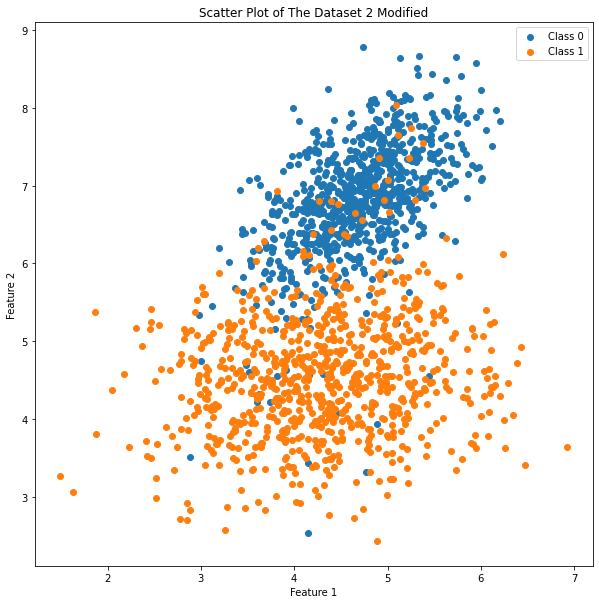

In [42]:
#Plotting Dataset2_modified
df2m_x1_label_0 = df2m_label_0[0]
df2m_x2_label_0 = df2m_label_0[1]

df2m_x1_label_1 = df2m_label_1[0]
df2m_x2_label_1 = df2m_label_1[1]

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

ax.scatter(df2m_x1_label_0,df2m_x2_label_0)
ax.scatter(df2m_x1_label_1,df2m_x2_label_1)

ax.legend(["Class 0", "Class 1"])
plt.title("Scatter Plot of The Dataset 2 Modified")
plt.ylabel("Feature 2")
plt.xlabel("Feature 1")

**By looking at the Dataset 2 Modified scatter plot, we can say that there is more overlay data points between classes than the Dataset 2. And this might causes to decrease the model performance (accuracy) and increase the error rate. However, this might causes to increase the model performance (accuracy) and decrease the error rate because of the variance of the modified training data**

## Training and Testing the Dataset2_Modified

### Finding Mean Vectors and Covariance Matrices for Each Class

In [43]:
df2m_label_0 = df2m[df2m['y'] == 0]
df2m_label_1 = df2m[df2m['y'] == 1]

df2m_features_0 = df2m_label_0[['x1','x2']].values.T
df2m_features_1 = df2m_label_1[['x1','x2']].values.T

mean_vector_df2m_class_0 = np.array([np.mean(df2m_features_0[0]),np.mean(df2m_features_0[1])])
mean_vector_df2m_class_1 = np.array([np.mean(df2m_features_1[0]),np.mean(df2m_features_1[1])])

cov_matr_df2m_0 = calculate_covariance(df2m_features_0)
cov_matr_df2m_1 = calculate_covariance(df2m_features_1)

print("Mean Vector of Modified Dataset 2 Class 0\n", mean_vector_df2m_class_0,"\n")
print("Mean Vector of Modified Dataset 2 Class 1\n", mean_vector_df2m_class_1,"\n")

print("Covariance Matrix of Modified Dataset 2 Class 0\n", cov_matr_df2m_0,"\n")
print("Covariance Matrix of Modified Dataset 2 Class 1\n", cov_matr_df2m_1,"\n")

Mean Vector of Modified Dataset 2 Class 0
 [4.67525961 6.82826434] 

Mean Vector of Modified Dataset 2 Class 1
 [4.30947868 4.56421677] 

Covariance Matrix of Modified Dataset 2 Class 0
 [[0.31185118 0.22734907]
 [0.22734907 0.55306169]] 

Covariance Matrix of Modified Dataset 2 Class 1
 [[0.76729844 0.11960038]
 [0.11960038 0.66455599]] 



### Training - Testing for Modified Dataset 2

In [44]:
a0,b0,a1,b1,quad_0, quad_1 = trainBayes(df2m)
my_res_2 = np.array(classify_dataset(test2,a0,b0,a1,b1,quad_0,quad_1)).astype(np.float32)
ground_truth_test2 = test2['y'].values
res_2 = np.abs(ground_truth_test2 - my_res_2)
occurrences = np.count_nonzero(res_2 == 1)
error_rate = (occurrences/len(test2))*100
print("The error rate of Dataset 2 Modified is: %",error_rate)

The error rate of Dataset 2 Modified is: % 2.5


**As we can see from above, we have %2.5 error rate which is lower than the trained by the normal dataset2. The performance of this model is higher than the other model trained by the normal dataset. If we look at the covariance matrices for the normal dataset2 and modified dataset2, variance values of the modified dataset2 is higher than the normal dataset2 for both classes. Also, the modified training set has more outliers and the Bayes classifier may learn these samples more adaptive than the normal dataset2. That's why it may perform better for the samples which are located on the between of the classes. In addition, the test samples might be similar to the modified dataset2 about localization. Thus, these samples may be performed better on the Bayes classifier discriminant function of the modified dataset2 than the normal dataset2.**